# Data Exploration

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

train_data = pd.read_csv("/kaggle/input/ys19-2023-assignment-1/train_set.csv")
valid_data = pd.read_csv("/kaggle/input/ys19-2023-assignment-1/valid_set.csv")
test_data = pd.read_csv("/kaggle/input/ys19-2023-assignment-1/test_set.csv")

print(train_data)

train_data.describe()

       New_ID                                               Text Sentiment  \
0       35027  #απολυμανση_κοριοι #απεντομωση_κοριος #απολυμα...   NEUTRAL   
1        9531  Έξι νέες επιστολές για τη Μακεδονία «καίνε» τη...  NEGATIVE   
2       14146  Ισχυρό ΚΚΕ, δύναμη του λαού στη Βουλή και στου...  POSITIVE   
3       28716  @five2nds @anthi7vas Μνημονιακότατο το #ΜεΡΑ25...   NEUTRAL   
4       32886  @ai_katerina Αυτό που είναι συγκλονιστικό είνα...   NEUTRAL   
...       ...                                                ...       ...   
36625   35374  @KourtakisJohn @kmitsotakis Ο Κούλης ο Μητσοτά...   NEUTRAL   
36626    7744  @enikos_gr @NChatzinikolaou @AdonisGeorgiadi Π...  NEGATIVE   
36627   35216  Η θέση του ΚΚΕ για την ασφάλεια των πολιτών κα...   NEUTRAL   
36628    2855  @thanosplevris Μαρη κακομοίρα θυγατέρα του ναζ...  NEGATIVE   
36629   25500  @gijjstalking @SpirosR76 Εντάξει με έπεισες! Κ...   NEUTRAL   

        Party  
0      SYRIZA  
1          ND  
2         KKE  

,New_ID
count,36630.000000
mean,18315.500000
std,10574.314517
min,1.000000
25%,9158.250000
50%,18315.500000
75%,27472.750000
max,36630.000000


In [2]:
test_data['Party'].unique()

array(['ND', 'KKE', 'PASOK', 'DIEM', 'SYRIZA', 'ELL_LYSI'], dtype=object)

# Data Preprocessing

Cleaning, tokenization and lowercasing

In [3]:
import re
import unicodedata
from nltk.tokenize import word_tokenize

def strip_accents(text):
   return ''.join(c for c in unicodedata.normalize('NFD', text)
                  if unicodedata.category(c) != 'Mn')

# text cleaning and tokenization
def preprocess_text(text):
    # remove links and tags
    text = re.sub(r"http\S+|www\S+|@[^\s]+", ' ', text)
    
    # remove acute accents from Greek vowels
    text = strip_accents(text)
    
    # remove special characters
    text = re.sub(r"[^A-Za-z0-9Α-Ωα-ω]+", ' ', text)
    
    # tokenize the text
    tokens = word_tokenize(text)
    
    # lowercasing
    tokens = [token.lower() for token in tokens]
    
    return ' '.join(tokens)

train_data['Processed_Text'] = train_data['Text'].apply(preprocess_text)
valid_data['Processed_Text'] = valid_data['Text'].apply(preprocess_text)
test_data['Processed_Text'] = test_data['Text'].apply(preprocess_text)
print(train_data)

       New_ID                                               Text Sentiment  \
0       35027  #απολυμανση_κοριοι #απεντομωση_κοριος #απολυμα...   NEUTRAL   
1        9531  Έξι νέες επιστολές για τη Μακεδονία «καίνε» τη...  NEGATIVE   
2       14146  Ισχυρό ΚΚΕ, δύναμη του λαού στη Βουλή και στου...  POSITIVE   
3       28716  @five2nds @anthi7vas Μνημονιακότατο το #ΜεΡΑ25...   NEUTRAL   
4       32886  @ai_katerina Αυτό που είναι συγκλονιστικό είνα...   NEUTRAL   
...       ...                                                ...       ...   
36625   35374  @KourtakisJohn @kmitsotakis Ο Κούλης ο Μητσοτά...   NEUTRAL   
36626    7744  @enikos_gr @NChatzinikolaou @AdonisGeorgiadi Π...  NEGATIVE   
36627   35216  Η θέση του ΚΚΕ για την ασφάλεια των πολιτών κα...   NEUTRAL   
36628    2855  @thanosplevris Μαρη κακομοίρα θυγατέρα του ναζ...  NEGATIVE   
36629   25500  @gijjstalking @SpirosR76 Εντάξει με έπεισες! Κ...   NEUTRAL   

        Party                                     Processed_Tex

Lemmatization

In [4]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 43.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [5]:
import spacy

# model for lemmatizing Greek text
nlp = spacy.load("el_core_news_sm")  # * try el_core_news_md, el_core_news_lg

# apply lemmatization
def lemmatize_greek_text(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    return ' '.join(lemmatized_tokens)

train_data['Processed_Text'] = train_data['Processed_Text'].apply(lemmatize_greek_text)
valid_data['Processed_Text'] = valid_data['Processed_Text'].apply(lemmatize_greek_text)
test_data['Processed_Text'] = test_data['Processed_Text'].apply(lemmatize_greek_text)
print(train_data)

       New_ID                                               Text Sentiment  \
0       35027  #απολυμανση_κοριοι #απεντομωση_κοριος #απολυμα...   NEUTRAL   
1        9531  Έξι νέες επιστολές για τη Μακεδονία «καίνε» τη...  NEGATIVE   
2       14146  Ισχυρό ΚΚΕ, δύναμη του λαού στη Βουλή και στου...  POSITIVE   
3       28716  @five2nds @anthi7vas Μνημονιακότατο το #ΜεΡΑ25...   NEUTRAL   
4       32886  @ai_katerina Αυτό που είναι συγκλονιστικό είνα...   NEUTRAL   
...       ...                                                ...       ...   
36625   35374  @KourtakisJohn @kmitsotakis Ο Κούλης ο Μητσοτά...   NEUTRAL   
36626    7744  @enikos_gr @NChatzinikolaou @AdonisGeorgiadi Π...  NEGATIVE   
36627   35216  Η θέση του ΚΚΕ για την ασφάλεια των πολιτών κα...   NEUTRAL   
36628    2855  @thanosplevris Μαρη κακομοίρα θυγατέρα του ναζ...  NEGATIVE   
36629   25500  @gijjstalking @SpirosR76 Εντάξει με έπεισες! Κ...   NEUTRAL   

        Party                                     Processed_Tex

# Analysis

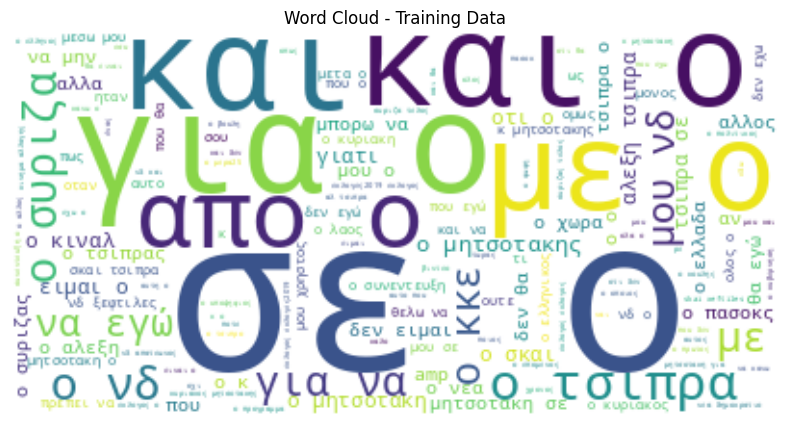

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# generate word clouds graph
def generate_word_cloud(text, title):
    wordcloud = WordCloud(background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_word_cloud(' '.join(train_data['Processed_Text']), 'Word Cloud - Training Data')

# Vectorization

Vectorization using TF-IDF

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

# fit and transform in the training data
train_tfidf = tfidf.fit_transform(train_data['Processed_Text'])

# transform for the validation and test data
valid_tfidf = tfidf.transform(valid_data['Processed_Text'])
test_tfidf = tfidf.transform(test_data['Processed_Text'])

# Logistic regression model implementation 

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logistic_regression = LogisticRegression(max_iter=1000)

# fitting to the training data
logistic_regression.fit(train_tfidf, train_data['Sentiment'])

# prediction
valid_predicted = logistic_regression.predict(valid_tfidf)

# evaluation
accuracy = accuracy_score(valid_data['Sentiment'], valid_predicted)
report = classification_report(valid_data['Sentiment'], valid_predicted)

print(f"Accuracy on the validation set: {accuracy:.2f}")
print("\nClassification Report:\n", report)

Accuracy on the validation set: 0.40

Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.38      0.40      0.39      1744
     NEUTRAL       0.40      0.39      0.39      1744
    POSITIVE       0.41      0.40      0.41      1744

    accuracy                           0.40      5232
   macro avg       0.40      0.40      0.40      5232
weighted avg       0.40      0.40      0.40      5232



Optimizing the hyperparameters

In [9]:
from sklearn.model_selection import GridSearchCV

# the hyperparameters that will be tested
param_grid = {
    'max_iter': [1000, 2000, 5000],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear','sag','saga'],
#     'penalty': ['l1', 'l2', 'elasticnet'],
}

grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

grid_search.fit(train_tfidf, train_data['Sentiment'])

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)

Best Parameters: {'C': 0.01, 'max_iter': 1000, 'solver': 'saga'}
Best Accuracy Score: 0.3880698880698881


# Evaluation

F1 Score Train: 0.2177777777777778
F1 Score Validation: 0.16666666666666666
F1 Score Train: 0.24439913671304847
F1 Score Validation: 0.1980620618594221
F1 Score Train: 0.36359296048277195
F1 Score Validation: 0.2857124207640661
F1 Score Train: 0.4129934768098103
F1 Score Validation: 0.33746687751807
F1 Score Train: 0.4921052218255815
F1 Score Validation: 0.38929953942697343
F1 Score Train: 0.49098800519072433
F1 Score Validation: 0.39785250883391127
F1 Score Train: 0.46037659464484554
F1 Score Validation: 0.3897493987275522
F1 Score Train: 0.4629544673890073
F1 Score Validation: 0.3966007585416377
F1 Score Train: 0.4533621905803939
F1 Score Validation: 0.39341248953241986
F1 Score Train: 0.4485989429544257
F1 Score Validation: 0.4012908789358733


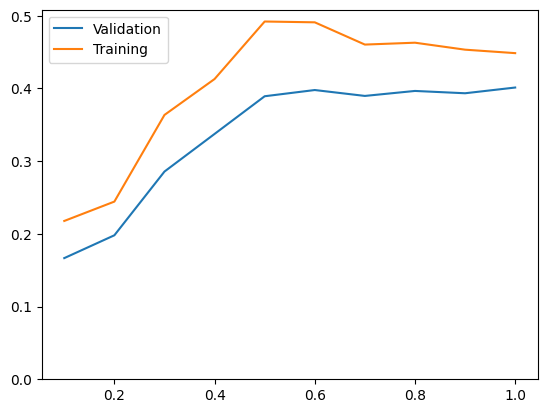

In [10]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

list_f1 = []
list_f1_train = []
list_sample_size = []

for times in range(10):
    # training
    X, X_unused, y, y_unused = train_test_split(train_tfidf, train_data['Sentiment'], test_size=1 - (times * 0.1 + 0.001))

    logistic_regression = LogisticRegression(max_iter=5000, C=0.01, solver='saga')
    logistic_regression.fit(X, np.ravel(y))

    results_train = logistic_regression.predict(X)

    # validation
    results = logistic_regression.predict(valid_tfidf)

    # score
    f1_train = f1_score(y, results_train, average='weighted')
    print("F1 Score Train: " + str(f1_train))

    f1 = f1_score(valid_data['Sentiment'], results, average='weighted')
    print("F1 Score Validation: " + str(f1))

    list_f1.append(f1)
    list_f1_train.append(f1_train)
    list_sample_size.append((times * 0.1 + 0.1))

plt.plot(list_sample_size, list_f1)
plt.plot(list_sample_size, list_f1_train)

plt.ylim(ymin=0)
plt.legend(["Validation", "Training"])
plt.show()

Retrain the model with the best parameters to re evaluate

In [11]:
logistic_regression = LogisticRegression(max_iter=5000, C=0.01, solver='saga')

# fitting to the training data
logistic_regression.fit(train_tfidf, train_data['Sentiment'])

# prediction
valid_predicted = logistic_regression.predict(valid_tfidf)

# evaluation
accuracy = accuracy_score(valid_data['Sentiment'], valid_predicted)
report = classification_report(valid_data['Sentiment'], valid_predicted)

print(f"Accuracy on the validation set: {accuracy:.2f}")
print("\nClassification Report:\n", report)

Accuracy on the validation set: 0.40

Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.40      0.52      0.45      1744
     NEUTRAL       0.40      0.35      0.37      1744
    POSITIVE       0.42      0.34      0.38      1744

    accuracy                           0.40      5232
   macro avg       0.40      0.40      0.40      5232
weighted avg       0.40      0.40      0.40      5232



# Output prediction

In [12]:
test_prediction = logistic_regression.predict(test_tfidf)
submission = pd.DataFrame({'Id': test_data['New_ID'], 'Predicted': test_prediction})
submission.to_csv('submission.csv', index=False)